In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../datasets/automobile.csv')

In [3]:
size_mapping = {'toyota': 1, 'nissan': 2, 'mazda': 3, 'mitsubishi': 4,
                'honda': 5, 'volkswagen': 6, 'subaru': 7, 'peugot': 8,
                'volvo': 9, 'dodge': 10, 'bmw': 11, 'mercedes-benz': 12,
                'plymouth': 13, 'audi': 14, 'saab': 15, 'porsche': 16, 
                'isuzu': 17, 'jaguar': 18, 'chevrolet': 19, 'alfa-romero': 20,
                'renault': 21, 'mercury': 22}
df['Make'] = df['Make'].map(size_mapping)

In [4]:
size_mapping = {'gas': 1, 'diesel': 2}
df['Fuel-type'] = df['Fuel-type'].map(size_mapping)

In [5]:
size_mapping = {'std': 1, 'turbo': 2}
df['Aspiration'] = df['Aspiration'].map(size_mapping)

In [6]:
size_mapping = {'four': 4, 'two': 2}
df['Num-of-doors'] = df['Num-of-doors'].map(size_mapping)

In [7]:
size_mapping = {'sedan': 1, 'hatchback': 2, 'wagon': 3, 'hardtop': 4,
                'convertible': 5}
df['Body-style'] = df['Body-style'].map(size_mapping)

In [8]:
size_mapping = {'fwd': 1, 'rwd': 2, '4wd': 3}
df['Drive-wheels'] = df['Drive-wheels'].map(size_mapping)

In [9]:
size_mapping = {'front': 1, 'rear': 2}
df['Engine-location'] = df['Engine-location'].map(size_mapping)

In [10]:
size_mapping = {'ohc': 1, 'ohcf': 2, 'ohcv': 3, 'l': 4,
                'dohc': 5, 'rotor': 6, 'dohcv': 7}
df['Engine-type'] = df['Engine-type'].map(size_mapping)

In [11]:
size_mapping = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2,
                'twelve': 12, 'three': 3}
df['Num-of-cylinders'] = df['Num-of-cylinders'].map(size_mapping)

In [12]:
size_mapping = {'mpfi': 1, '2bbl': 2, 'idi': 3, '1bbl': 4,
                'spdi': 5, '4bbl': 6, 'spfi': 7, 'mfi': 8}
df['Fuel-system'] = df['Fuel-system'].map(size_mapping)

In [13]:
# replace ? to NaN
df = df.replace('?',np.nan)

# change dtypes: object to float
dic = {}
for i in df.columns[:-1]:
    dic[i] = float

df = df.astype(dic)

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(159, 26)

In [16]:
X=df.iloc[:,:25]
y=df['Symboling']

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X = np.array(X)
y = np.array(y)

# scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [20]:
from sklearn.svm import SVC
# learning
kernel = ['linear', 'rbf', 'poly']
clf = []

for i in kernel:
    svm = SVC(C=1.0, gamma='auto', kernel=i, random_state=42)
    clf.append(svm.fit(X_train, y_train))

In [21]:
from sklearn import metrics

In [22]:
def calc_metrics(y_test, y_pred):
    pre = metrics.precision_score(y_test, y_pred, average='micro')
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='micro')
    metrics_list = [pre, recall, acc, f1]
    
    return metrics_list

In [23]:
result = []

for i in range(len(clf)):
    y_pred = clf[i].predict(X_test)
    result.append(calc_metrics(y_test, y_pred))


In [24]:
result_df = pd.DataFrame(result, columns=['Precision', 'Recall', 'Acc', 'F-score'])
result_df = result_df.assign(Kernel=kernel)
result_df = result_df[['Kernel', 'Precision', 'Recall', 'Acc', 'F-score']]
round(result_df, 3)


,Kernel,Precision,Recall,Acc,F-score
0,linear,0.609,0.609,0.609,0.609
1,rbf,0.484,0.484,0.484,0.484
2,poly,0.453,0.453,0.453,0.453


In [25]:
result_mlt = pd.melt(result_df, id_vars='Kernel', var_name='Metrics', value_name='values')
result_mlt


,Kernel,Metrics,values
0,linear,Precision,0.609375
1,rbf,Precision,0.484375
2,poly,Precision,0.453125
3,linear,Recall,0.609375
4,rbf,Recall,0.484375
5,poly,Recall,0.453125
6,linear,Acc,0.609375
7,rbf,Acc,0.484375
8,poly,Acc,0.453125
9,linear,F-score,0.609375


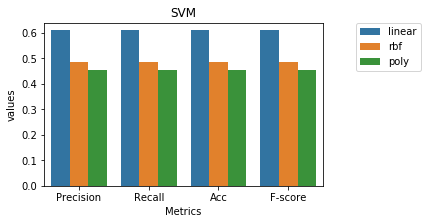

In [26]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Metrics', y='values', hue='Kernel', data=result_mlt)
plt.title('SVM')
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
tuning_parm = [
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear']},
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']},
]

clf_SVM = GridSearchCV(SVC(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [29]:
clf_SVM.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_micro', verbose=0)

In [30]:
grid_df = pd.DataFrame.from_dict(clf_SVM.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000813,0.000113,0.000607,0.000032,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.772727,0.684211,...,0.684211,0.054255,6,0.986301,0.986842,0.974026,0.987013,0.974026,0.981642,0.006223
1,0.001450,0.000615,0.001172,0.000383,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.772727,0.684211,...,0.684211,0.054255,6,0.986301,0.986842,0.974026,0.987013,0.974026,0.981642,0.006223
2,0.000842,0.000164,0.000855,0.000367,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.772727,0.684211,...,0.684211,0.054255,6,0.986301,0.986842,0.974026,0.987013,0.974026,0.981642,0.006223
3,0.000849,0.000156,0.000577,0.000053,10,0.1,linear,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.727273,0.684211,...,0.684211,0.064134,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000813,0.000105,0.000603,0.000088,10,0.01,linear,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}",0.727273,0.684211,...,0.684211,0.064134,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [31]:
col = ['mean_train_score', 'params']
grid_df = grid_df[col]
grid_df.sort_values(by=['mean_train_score'], ascending=False)

,mean_train_score,params
16,1.000000,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
3,1.000000,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}"
4,1.000000,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}"
5,1.000000,"{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}"
6,1.000000,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}"
7,1.000000,"{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}"
8,1.000000,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}"
24,1.000000,"{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}"
21,1.000000,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}"
12,1.000000,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"


In [32]:
clf_SVM.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [33]:
clf_SVM.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
clf_SVM=SVC(C=100,kernel='rbf',degree=3, gamma=0.01)
clf_SVM.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
# predict label
y_pred = clf_SVM.predict(X_test)

In [72]:
confusion_matrix(y_test, y_pred)

array([[ 0,  1,  2,  0,  0,  0],
       [ 0,  6,  2,  0,  0,  0],
       [ 0,  0, 11,  0,  1,  0],
       [ 0,  2,  1, 17,  1,  0],
       [ 0,  0,  1,  7,  5,  0],
       [ 0,  0,  5,  2,  0,  0]])

In [73]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.609375


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
tuned_parameters = [
    {'C': [0.001,0.01,0.1,1, 10, 100, 1000]}
    ]

In [40]:
score = 'f1'
clf_LR = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5)

In [41]:
clf_LR.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
grid_df = pd.DataFrame.from_dict(clf_LR.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001755,0.000801,0.000421,0.000159,0.001,{'C': 0.001},0.545455,0.578947,0.500000,0.444444,0.555556,0.526316,0.046926,7
1,0.001686,0.000231,0.000470,0.000188,0.01,{'C': 0.01},0.636364,0.684211,0.444444,0.500000,0.611111,0.578947,0.088228,6
2,0.001874,0.000309,0.000391,0.000119,0.1,{'C': 0.1},0.681818,0.736842,0.611111,0.666667,0.666667,0.673684,0.039669,1
3,0.002931,0.000651,0.000672,0.000484,1,{'C': 1},0.681818,0.578947,0.555556,0.611111,0.722222,0.631579,0.062207,4
4,0.002538,0.000682,0.000453,0.000319,10,{'C': 10},0.772727,0.684211,0.555556,0.555556,0.722222,0.663158,0.088980,2


In [43]:
clf_LR.best_params_

{'C': 0.1}

In [44]:
clf_LR.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# learning
clf_LR = LogisticRegression(penalty='l2', C=0.1)
clf_LR.fit(X_train, y_train)
y_pred = clf_LR.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [46]:
confusion_matrix(y_test, y_pred)

array([[ 0,  1,  2,  0,  0,  0],
       [ 0,  1,  7,  0,  0,  0],
       [ 0,  0, 10,  2,  0,  0],
       [ 0,  1,  2, 16,  1,  1],
       [ 0,  0,  2,  8,  3,  0],
       [ 0,  0,  3,  4,  0,  0]])

In [47]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.46875


In [48]:
from sklearn.neighbors import KNeighborsClassifier

[1] score: 0.59
[2] score: 0.50
[3] score: 0.48
[4] score: 0.45
[5] score: 0.44
[6] score: 0.44
[7] score: 0.47
[8] score: 0.45
[9] score: 0.45
[10] score: 0.45
[11] score: 0.44
[12] score: 0.39
[13] score: 0.42
[14] score: 0.39
[15] score: 0.39
[16] score: 0.41
[17] score: 0.39
[18] score: 0.39
[19] score: 0.38
[20] score: 0.42
[21] score: 0.42
[22] score: 0.42
[23] score: 0.42
[24] score: 0.42
[25] score: 0.42
[26] score: 0.42
[27] score: 0.42
[28] score: 0.42
[29] score: 0.44
[30] score: 0.44


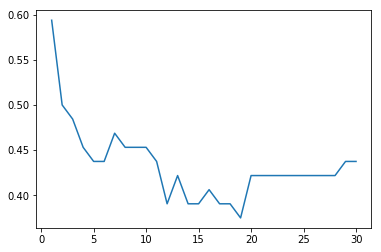

In [50]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_brute = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    clf=knc_brute
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)
    
plt.plot(list_nn, list_score)

[1] score: 0.59
[2] score: 0.50
[3] score: 0.48
[4] score: 0.45
[5] score: 0.44
[6] score: 0.44
[7] score: 0.47
[8] score: 0.45
[9] score: 0.45
[10] score: 0.45
[11] score: 0.44
[12] score: 0.39
[13] score: 0.42
[14] score: 0.39
[15] score: 0.39
[16] score: 0.41
[17] score: 0.39
[18] score: 0.39
[19] score: 0.38
[20] score: 0.42
[21] score: 0.42
[22] score: 0.42
[23] score: 0.42
[24] score: 0.42
[25] score: 0.42
[26] score: 0.42
[27] score: 0.42
[28] score: 0.42
[29] score: 0.44
[30] score: 0.44


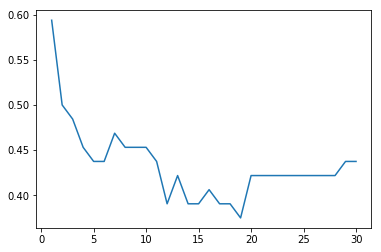

In [51]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_ball = KNeighborsClassifier(n_neighbors=k,algorithm='ball_tree')
    clf = knc_ball
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)
    
plt.plot(list_nn, list_score)

[1] score: 0.59
[2] score: 0.50
[3] score: 0.48
[4] score: 0.45
[5] score: 0.44
[6] score: 0.44
[7] score: 0.47
[8] score: 0.45
[9] score: 0.45
[10] score: 0.45
[11] score: 0.44
[12] score: 0.39
[13] score: 0.42
[14] score: 0.39
[15] score: 0.39
[16] score: 0.41
[17] score: 0.39
[18] score: 0.39
[19] score: 0.38
[20] score: 0.42
[21] score: 0.42
[22] score: 0.42
[23] score: 0.42
[24] score: 0.42
[25] score: 0.42
[26] score: 0.42
[27] score: 0.42
[28] score: 0.42
[29] score: 0.44
[30] score: 0.44


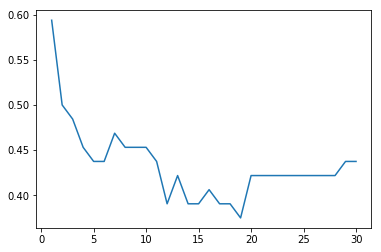

In [52]:
list_score = []
list_nn = []
for k in range(1,31):
    knc_kd = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    clf = knc_kd
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    list_score.append(acc)
    list_nn.append(k)
    print("[%d] score: {:.2f}".format(acc) % k)
    
plt.plot(list_nn, list_score)

In [53]:
knc=KNeighborsClassifier(n_neighbors=10,algorithm='brute')
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [54]:
y_pred=knc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  3,  0,  0,  0],
       [ 0,  3,  5,  0,  0,  0],
       [ 0,  1,  9,  1,  1,  0],
       [ 0,  1,  5, 15,  0,  0],
       [ 0,  1,  5,  5,  2,  0],
       [ 0,  0,  5,  2,  0,  0]])

In [55]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.453125


In [56]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [57]:
clf_DT=DecisionTreeClassifier(criterion='gini',max_depth=10)
clf_DT=clf_DT.fit(X_train,y_train)

y_pred=clf_DT.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.625


In [58]:
dot = StringIO()
export_graphviz(clf_DT, out_file = dot)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_pdf("../graph/graph_gini.pdf")

True

In [59]:
clf_DT=DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf_DT=clf_DT.fit(X_train,y_train)

y_pred=clf_DT.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.71875


In [60]:
dot = StringIO()
export_graphviz(clf_DT, out_file = dot)
graph = pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_pdf("../graph/graph_entropy.pdf")

True

In [61]:
tuning_parm = [
    {'max_depth': [1, 10, 50], 'criterion': ['gini']},
    {'max_depth': [1, 10, 50], 'criterion': ['entropy']}
]

clf_TREE = GridSearchCV(DecisionTreeClassifier(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [62]:
clf_TREE.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini'], 'max_depth': [1, 10, 50]},
                         {'criterion': ['entropy'], 'max_dep

In [63]:
grid_df = pd.DataFrame.from_dict(clf_TREE.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001001,0.000470,0.001325,0.000203,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.454545,0.578947,0.611111,...,0.547368,0.064495,5,0.616438,0.578947,0.571429,0.571429,0.558442,0.579337,0.019689
1,0.000817,0.000070,0.000836,0.000109,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.727273,0.684211,0.666667,...,0.715789,0.091873,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.000752,0.000128,0.000843,0.000075,gini,50,"{'criterion': 'gini', 'max_depth': 50}",0.681818,0.736842,0.666667,...,0.694737,0.121943,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.000349,0.000033,0.000541,0.000040,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.454545,0.578947,0.611111,...,0.484211,0.114768,6,0.616438,0.578947,0.571429,0.454545,0.558442,0.555960,0.054252
4,0.001474,0.001114,0.000959,0.000276,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.681818,0.736842,0.722222,...,0.705263,0.087952,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [64]:
col = ['mean_train_score', 'params']
grid_df = grid_df[col]
grid_df.sort_values(by=['mean_train_score'], ascending=False)

,mean_train_score,params
1,1.000000,"{'criterion': 'gini', 'max_depth': 10}"
2,1.000000,"{'criterion': 'gini', 'max_depth': 50}"
4,1.000000,"{'criterion': 'entropy', 'max_depth': 10}"
5,1.000000,"{'criterion': 'entropy', 'max_depth': 50}"
0,0.579337,"{'criterion': 'gini', 'max_depth': 1}"
3,0.555960,"{'criterion': 'entropy', 'max_depth': 1}"


In [65]:
clf_TREE.best_params_

{'criterion': 'gini', 'max_depth': 10}